In [30]:
df = pd.read_csv('Dataset-Praktikum (2).csv')

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.metrics import davies_bouldin_score, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
plt.style.use('fivethirtyeight')

# **EDA**

In [31]:
df.head()

,IDPelanggan,Kelamin,Usia,Pendapatan (juta Rp),Rating_pengeluaran (1-100)
0,1,Laki,19,15,39
1,2,Laki,21,15,81
2,3,Perempuan,20,16,6
3,4,Perempuan,23,16,77
4,5,Perempuan,31,17,40


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   IDPelanggan                 200 non-null    int64 
 1   Kelamin                     200 non-null    object
 2   Usia                        200 non-null    int64 
 3   Pendapatan (juta Rp)        200 non-null    int64 
 4   Rating_pengeluaran (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [33]:
df.isnull().sum()

,0
IDPelanggan,0
Kelamin,0
Usia,0
Pendapatan (juta Rp),0
Rating_pengeluaran (1-100),0


In [34]:
df.shape

(200, 5)

In [35]:
df.describe(include=['object'])

,Kelamin
count,200
unique,2
top,Perempuan
freq,112


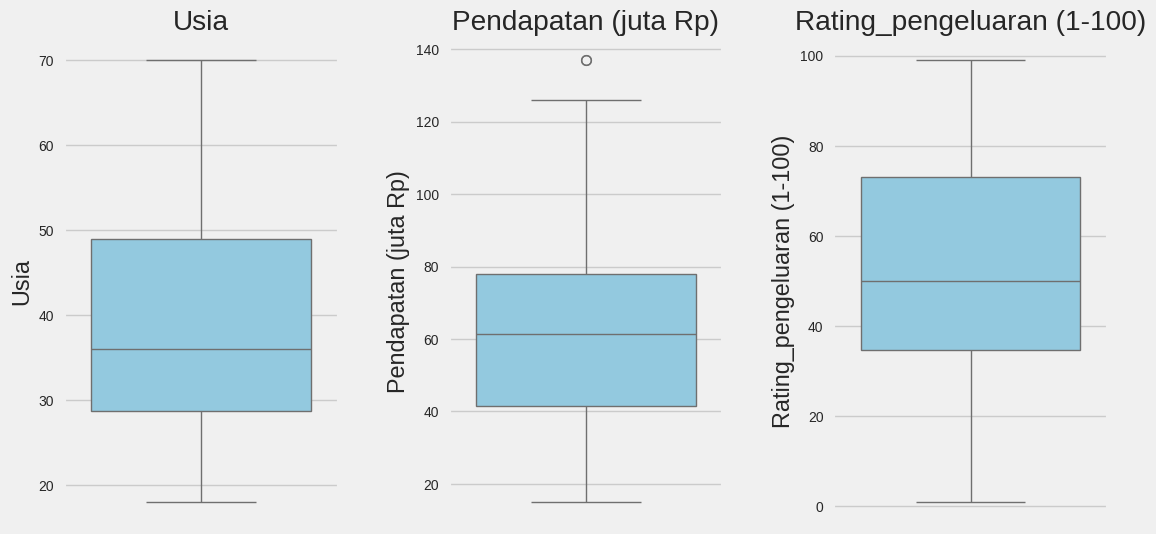

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

def box_plot(df):
  # Definisikan variabel yang akan divisualisasikan
  variables = ['Usia', 'Pendapatan (juta Rp)', 'Rating_pengeluaran (1-100)']

  # Buat figure dan axes untuk subplot dengan ukuran 1x3
  fig, axes = plt.subplots(1, 3, figsize=(12, 6)) # Sesuaikan ukuran figure
  fig.subplots_adjust(hspace=0.4, wspace=0.4) # Atur jarak antar subplot

  # Iterasi melalui setiap variabel dan buat boxplot
  for i, var in enumerate(variables):
    sns.boxplot(y=var, data=df, color='skyblue', ax=axes[i]) # Perhatikan perubahan di sini
    axes[i].set_title(var) # Tambahkan judul untuk setiap plot

  # Tampilkan plot
  plt.show()

# Panggil fungsi box_plot dengan data yang sesuai
box_plot(df)

# **PREPROCESING**

In [44]:
df.drop(['IDPelanggan'], axis=1, inplace=True)
df.head()

,Kelamin,Usia,Pendapatan (juta Rp),Rating_pengeluaran (1-100)
0,Laki,19,15,39
1,Laki,21,15,81
2,Perempuan,20,16,6
3,Perempuan,23,16,77
4,Perempuan,31,17,40


In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Kelamin'] = le.fit_transform(df['Kelamin'])
df.head()

,Kelamin,Usia,Pendapatan (juta Rp),Rating_pengeluaran (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [46]:
# instantiate
scaler = MinMaxScaler()

# fit & transform
X_scaled = scaler.fit_transform(df)
X_scaled

array([[0.        , 0.01923077, 0.        , 0.3877551 ],
       [0.        , 0.05769231, 0.        , 0.81632653],
       [1.        , 0.03846154, 0.00819672, 0.05102041],
       [1.        , 0.09615385, 0.00819672, 0.7755102 ],
       [1.        , 0.25      , 0.01639344, 0.39795918],
       [1.        , 0.07692308, 0.01639344, 0.76530612],
       [1.        , 0.32692308, 0.02459016, 0.05102041],
       [1.        , 0.09615385, 0.02459016, 0.94897959],
       [0.        , 0.88461538, 0.03278689, 0.02040816],
       [1.        , 0.23076923, 0.03278689, 0.7244898 ],
       [0.        , 0.94230769, 0.03278689, 0.13265306],
       [1.        , 0.32692308, 0.03278689, 1.        ],
       [1.        , 0.76923077, 0.04098361, 0.14285714],
       [1.        , 0.11538462, 0.04098361, 0.7755102 ],
       [0.        , 0.36538462, 0.04098361, 0.12244898],
       [0.        , 0.07692308, 0.04098361, 0.79591837],
       [1.        , 0.32692308, 0.04918033, 0.34693878],
       [0.        , 0.03846154,

# **MODELLING**

# **1. K-Means**

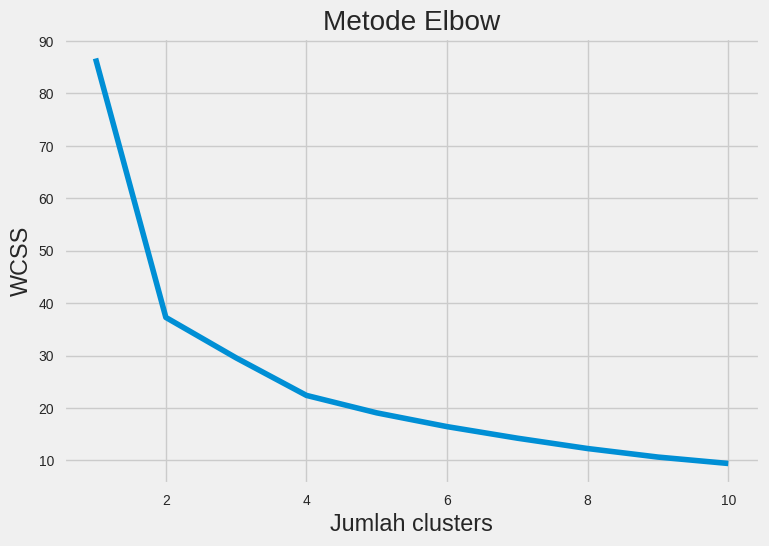

In [48]:
# Menggunakan metode elbow untuk menentukan angka cluster yang tepat
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot grafik Elbow
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah clusters')
plt.ylabel('WCSS')
plt.show()

In [49]:
# Menjalankan K-Means Clustering ke Datadset
model1 = KMeans(n_clusters=2, init='k-means++', random_state=42)
y_pred1 = model1.fit_predict(X_scaled)

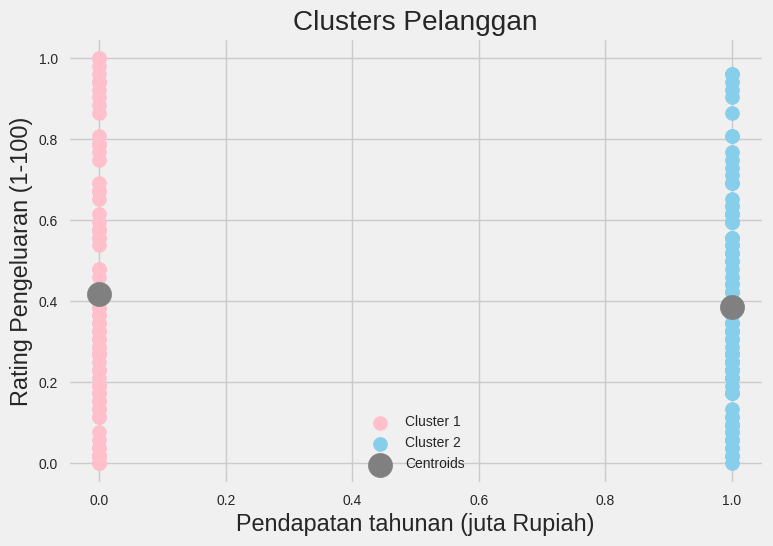

In [51]:
# Visualisasi hasil clusters
plt.scatter(X_scaled[y_pred1 == 0, 0], X_scaled[y_pred1 == 0, 1], s = 100, c = 'pink', label = 'Cluster 1')
plt.scatter(X_scaled[y_pred1 == 1, 0], X_scaled[y_pred1 == 1, 1], s = 100, c = 'skyblue', label = 'Cluster 2')
plt.scatter(model1.cluster_centers_[:, 0], model1.cluster_centers_[:, 1], s = 300, c = 'grey', label = 'Centroids')
plt.title('Clusters Pelanggan')
plt.xlabel('Pendapatan tahunan (juta Rupiah)')
plt.ylabel('Rating Pengeluaran (1-100)')
plt.legend()
plt.show()

# **2. DB- SCAN**

In [52]:
# Membuat objek DBSAN dnegan parameter epsilon dan jumlah minimum sampel
model2 = DBSCAN(eps=1, min_samples=5)

# Melakukan clustering pada data
model2.fit(X_scaled)

# Mendapatkan label untuk setiap data (-1 menandakan noise)
y_pred2 = model2.labels_
y_pred2

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0])

In [57]:
# Tambahkan label tersebut menjadi kolom baru didataset
df['Hasil_Clustering'] = model2.labels_
df.head()

,Kelamin,Usia,Pendapatan (juta Rp),Rating_pengeluaran (1-100),Hasil_Clustering
0,0,19,15,39,0
1,0,21,15,81,0
2,1,20,16,6,1
3,1,23,16,77,1
4,1,31,17,40,1


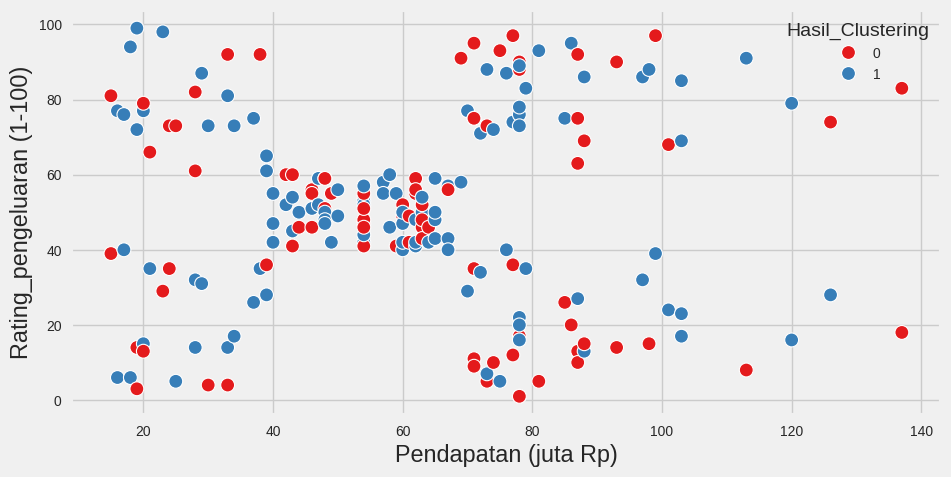

In [63]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Pendapatan (juta Rp)', y='Rating_pengeluaran (1-100)', hue='Hasil_Clustering', data=df, palette = 'Set1', s=100);

# **MATRIKS** **EVALUASI**

# 1. **Silhouette_score**

In [65]:
# Menghitung Silhouette_score algoritma k-means
Evaluasi_KMeans = silhouette_score(X_scaled, y_pred1)
print('Silhouette score:', Evaluasi_KMeans)

Silhouette score: 0.5194624832665107


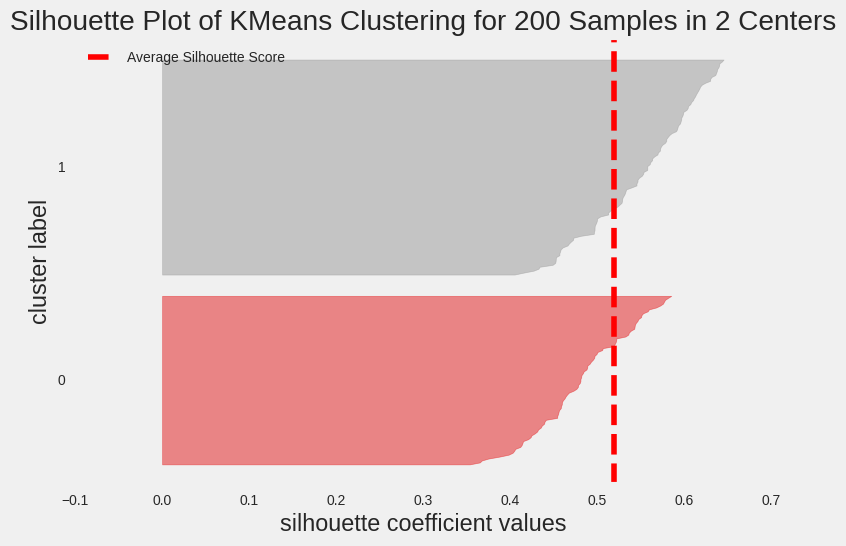

In [69]:
# Membuat sillhouette vizuallitation untuk algoritma k-means
silhouette_viz = SilhouetteVisualizer(model1)
silhouette_viz.fit(X_scaled)
plt.grid(False)
silhouette_viz.show()
plt.show()

In [67]:
# Menghitung silhouette_score algoritma db-scan
Evaluasi_DBSCAN = silhouette_score(X_scaled, y_pred2)
print('Silhouette score:', Evaluasi_DBSCAN)

Silhouette score: 0.5194624832665107


# 2. **Davies-Bouldin Index (DBI)**

In [73]:
# Menghitung Davies-Bouldin Index (DBI) algoritma k-means
dbi_score1 = davies_bouldin_score(X_scaled, y_pred1)
print('Davies-Bouldin Index (DBI):', dbi_score1)

Davies-Bouldin Index (DBI): 0.8172534497318451


In [76]:
# Menghitung Davies-Bouldin Index (DBI) algoritma k-means
dbi_score2 = davies_bouldin_score(X_scaled, y_pred2)
print('Davies-Bouldin Index (DBI):', dbi_score2)

Davies-Bouldin Index (DBI): 0.8172534497318451
